In [236]:
import pandas as pd

In [237]:
df = pd.read_csv('sysarmy_tech_salary_survey_2022.csv')
df.head()

,work_province,work_dedication,work_contract_type,monthly_gross_salary,monthly_net_salary,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,crypto_salary_percentage,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,varon cis
1,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,varon cis
2,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,varon cis
3,Chaco,Full-Time,Remoto (empresa de otro país),440000.0,0.0,True,Cobro todo el salario en dólares,220,Cobro todo el salario criptomonedas,100%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,varon cis
4,Chaco,Full-Time,Staff (planta permanente),140000.0,125000.0,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,varon cis


# Descriptive statistics

## sample mean

In a set, it is *the average value*

Given $N$ samples represented by $X$:

$$ \mathbb{E}(X) = \mu = \bar{X} = \frac{1}{N} \sum_i^N X_i $$

> this is a particular case of random variable



In [238]:
df.monthly_net_salary

0       245000.0
1       850000.0
2       115000.0
3            0.0
4       125000.0
          ...   
5353       214.8
5354     93000.0
5355    190900.0
5356    297750.0
5357     45000.0
Name: monthly_net_salary, Length: 5358, dtype: float64

In [239]:
salary_avg = df.monthly_net_salary.mean()
round(salary_avg, 2)

277010.79

## sample median

In an **ordered from least to greatest** set, it is *the middle value* 

In [240]:
salary_median = df.monthly_net_salary.median()
round(salary_median, 2)

201000.0

In [241]:
ticks = [salary_avg, salary_median, salary_mode]

## sample mode

The number that occurs most often in a set.df.monthly_net_salary.mode()

In [242]:
salary_mode = df.monthly_net_salary.mode()[0]
round(salary_mode, 2)

0.0

> this is an outlier!

In [243]:
legends = [f'avg: {round(salary_avg, 2)}', f'median: {round(salary_median, 2)} mode: {round(salary_mode, 2)}']

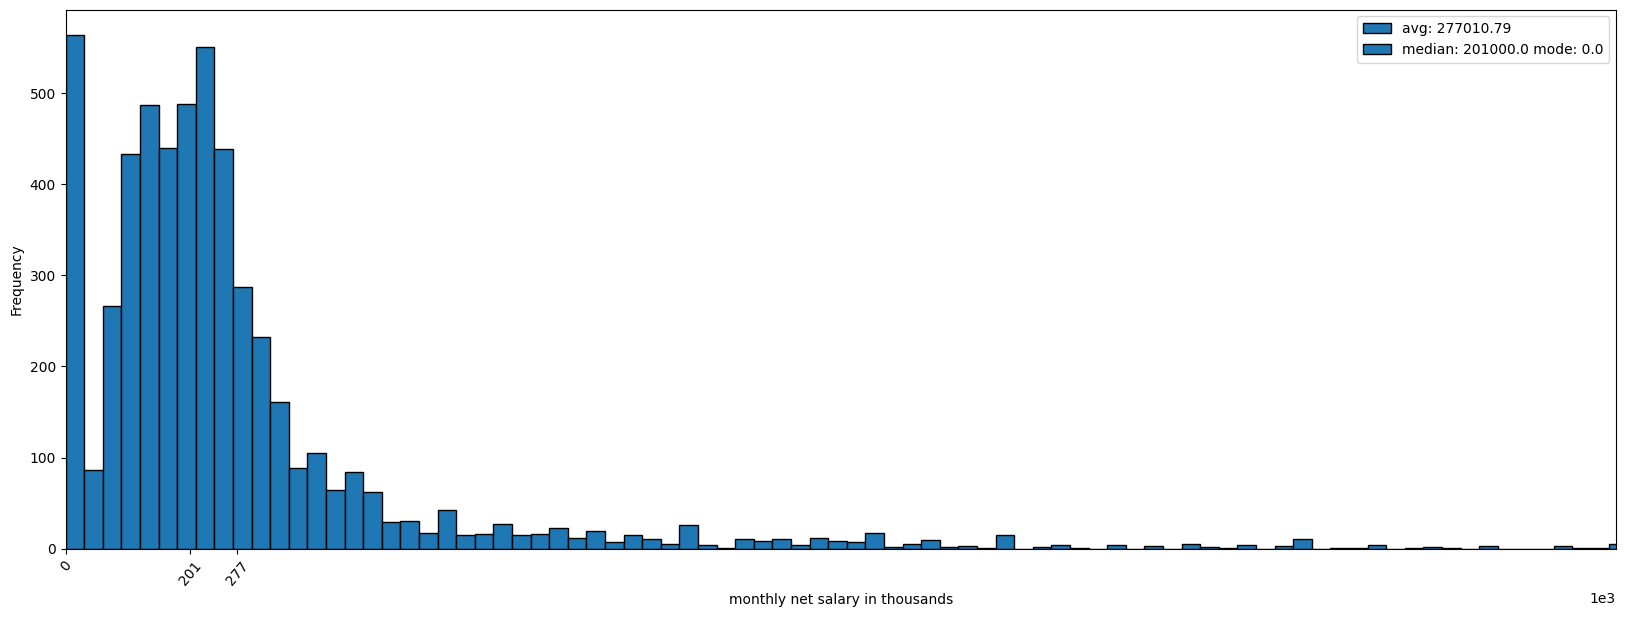

In [244]:
ax = df.monthly_net_salary.plot(kind='hist',
                                edgecolor='black',
                                bins=500,
                                xlim=(0, 2_500_000),
                                xlabel='monthly net salary in thousands',
                                xticks=ticks,
                                rot=50,
                                figsize=(20, 7),)
ax.ticklabel_format(axis='x', scilimits=(3, 3))
ax.legend(legends)

## percentile

For the $percentile_k = x_i$, the $k\%$ of the set values are lower than $x_i$,
- quartile $q_1$ :  the 25% of the set values are lower than it
- quartile $q_2$ (median):  the 50% of the set values are lower than it
- quartile $q_3$ :  the 75% of the set values are lower than it

In [245]:
q1, q2, q3 = df.monthly_net_salary.quantile(.25), df.monthly_net_salary.quantile(), df.monthly_net_salary.quantile(.75)
q1, q2, q3 

(118612.1875, 201000.0, 294000.0)

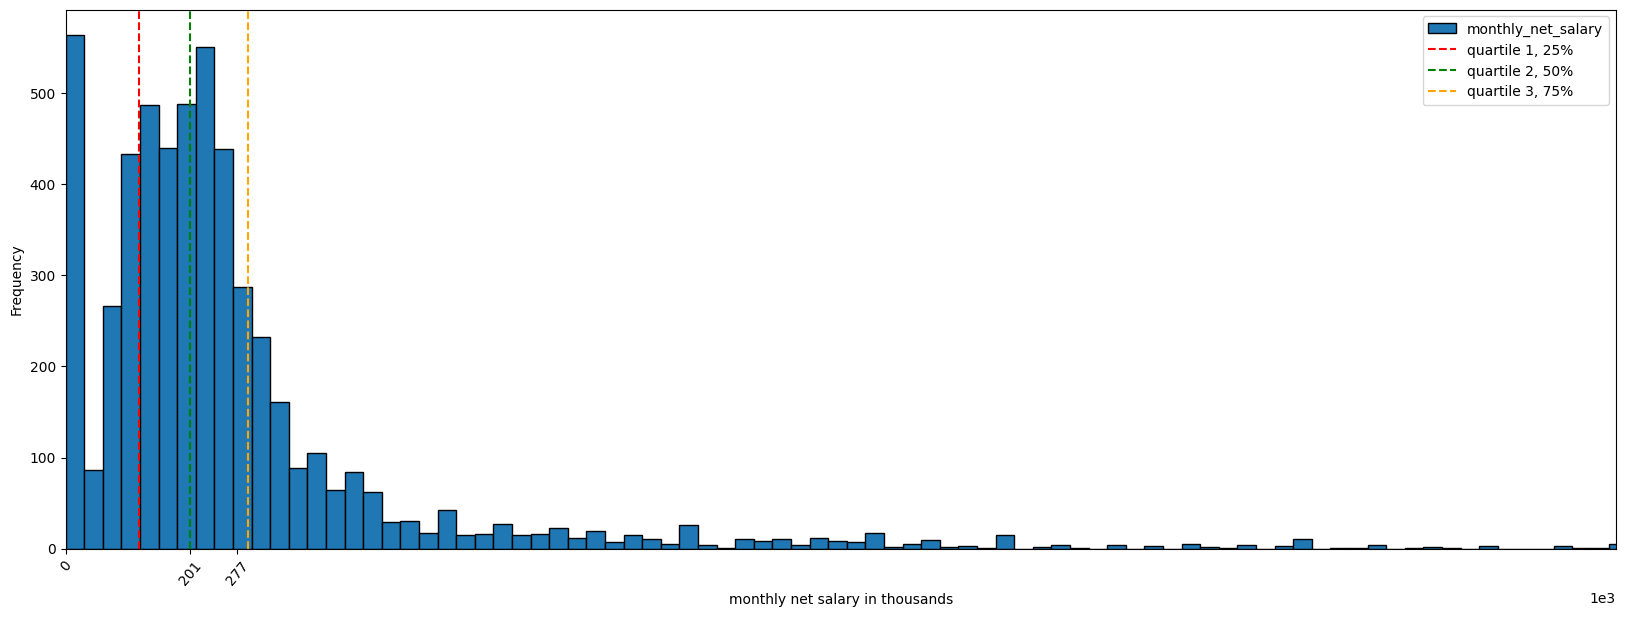

In [246]:
ax = df.monthly_net_salary.plot(kind='hist',
                                edgecolor='black',
                                bins=500,
                                xlim=(0, 2_500_000),
                                xlabel='monthly net salary in thousands',
                                xticks=ticks,
                                rot=50,
                                figsize=(20, 7),)
ax.ticklabel_format(axis='x', scilimits=(3, 3))
ax.legend(legends)
for i, (q, pct, color) in enumerate([(q1, '25%', 'red'), (q2, '50%', 'green'), (q3, '75%', 'orange')]):
    ax.axvline(q, color=color, label=f'quartile {i + 1}, {pct}',  linestyle='dashed')
ax.legend()

In [247]:
[round(tick, 2) for tick in ticks + [q1, q3]]

[277010.79, 201000.0, 0.0, 118612.19, 294000.0]

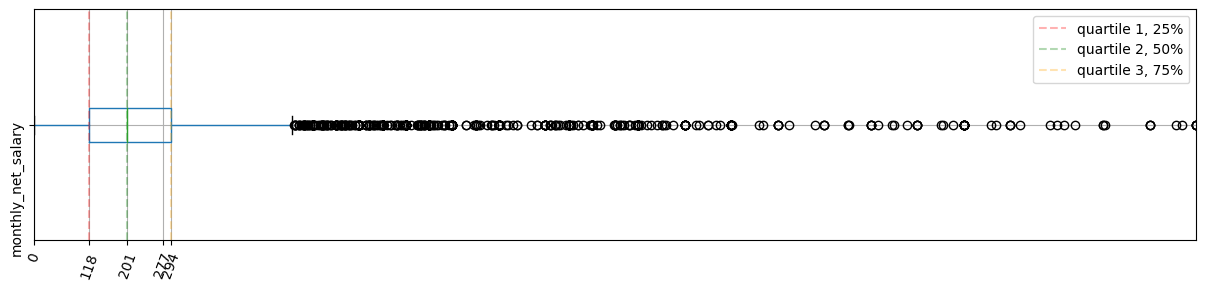

In [248]:
ax = df.boxplot(
    column='monthly_net_salary',
    vert=False,
    figsize=(15, 3),
    rot=90,
    )
ax.ticklabel_format(axis='x', scilimits=(3, 3))

for i, (q, pct, color) in enumerate([(q1, '25%', 'red'), (q2, '50%', 'green'), (q3, '75%', 'orange')]):
    ax.axvline(q, color=color, label=f'quartile {i + 1}, {pct}', linestyle='dashed', alpha=0.3)
ax.legend()
ax.set_xlim(0, 2_500_000)
xticks = [int(tick) for tick in ticks + [q1, q3]]
ax.set_xticks(ticks=xticks, labels=[int(tick/1000) for tick in xticks], rotation=70)

## Sample variance

The variance measures the "spread" of a distribution

$ \mathbb{V}(X) = \widehat{v} = \sigma^2 = \mathbb{E}(X - \mu)^2  = \frac{1}{N - 1}\sum_{i=1}^N{(x_i - \mu)^2}$

### standard desviation

$\sigma = \sqrt{\mathbb{V}(X)}$

In [249]:
salary_std = df.monthly_net_salary.std()
salary_std

401942.2987430476

In [250]:
xticks = [salary_avg, salary_median, salary_mode, salary_std, q1, q2, q3]

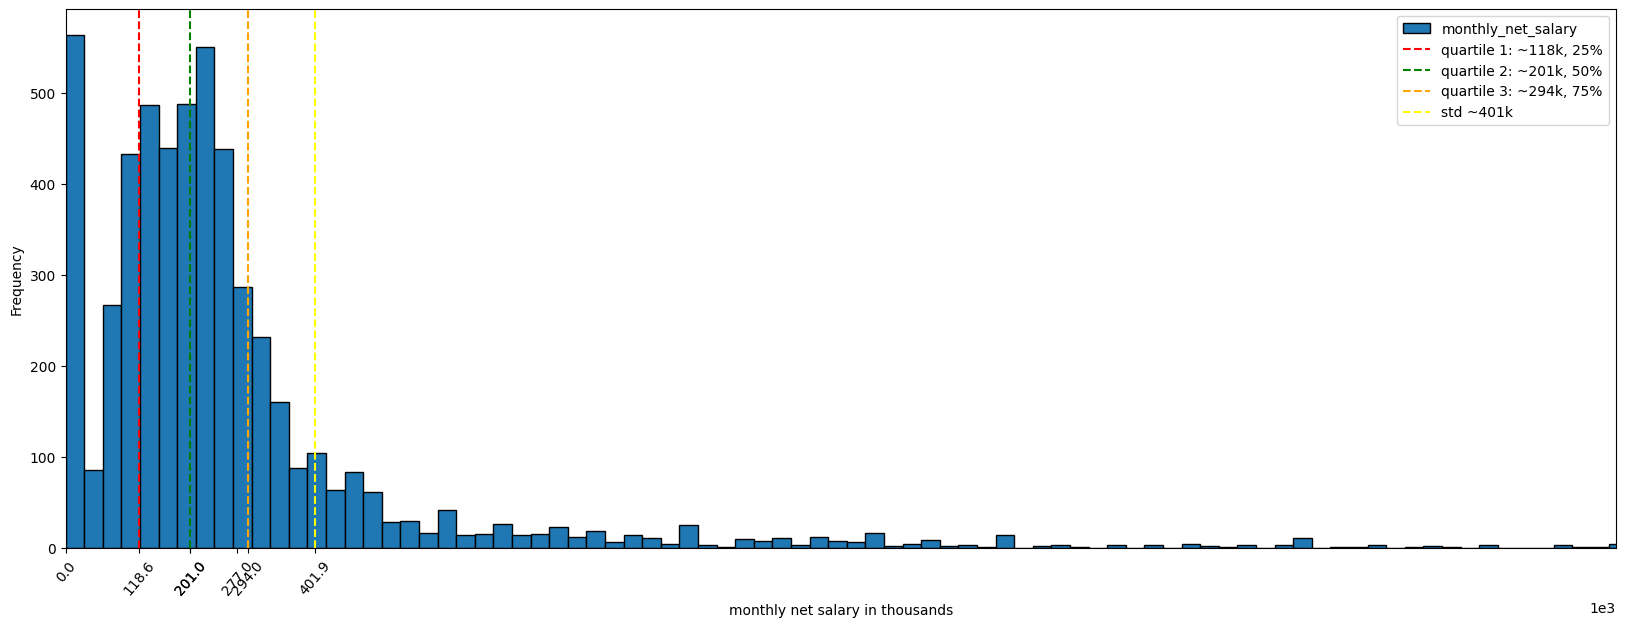

In [251]:
ax = df.monthly_net_salary.plot(kind='hist',
                                edgecolor='black',
                                bins=500,
                                xlim=(0, 2_500_000),
                                xlabel='monthly net salary in thousands',
                                xticks=xticks,
                                rot=50,
                                figsize=(20, 7),)
ax.ticklabel_format(axis='x', scilimits=(3, 3))
ax.legend(legends)
for i, (q, pct, color) in enumerate([(q1, '25%', 'red'), (q2, '50%', 'green'), (q3, '75%', 'orange')]):
    ax.axvline(q, color=color, label=f'quartile {i + 1}: ~{int(q / 1000)}k, {pct}',  linestyle='dashed')

ax.axvline(salary_std, color='yellow', label=f'std ~{int(salary_std / 1000)}k', linestyle='dashed')
ax.legend()